[View in Colaboratory](https://colab.research.google.com/github/prateek-01/Computer-Vision/blob/master/TransferLearning.ipynb)

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.datasets import cifar10
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils

import time
import datetime

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_examples = 40000

170508288/170498071 [==============================] - 25s 0us/step


In [0]:
X1_train = []
X1_test = []

X2_train = []
X2_test = []

Y1_train = []
Y1_test = []

Y2_train = []
Y2_test = []

for ix in range(n_examples):
    if y_train[ix] < 5:
        # Put data in set 01
        X1_train.append(x_train[ix]/255.0)
        Y1_train.append(y_train[ix])
    else:
        # Put data in set 02
        X2_train.append(x_train[ix]/255.0)
        Y2_train.append(y_train[ix])

for ix in range(y_test.shape[0]):
    if y_test[ix] < 5:
        # Put data in set 01
        X1_test.append(x_test[ix]/255.0)
        Y1_test.append(y_test[ix])
    else:
        # Put data in set 02
        X2_test.append(x_test[ix]/255.0)
        Y2_test.append(y_test[ix])

In [0]:
X1_train = np.asarray(X1_train).reshape((-1, 32, 32, 3))
X1_test = np.asarray(X1_test).reshape((-1, 32, 32, 3))

X2_train = np.asarray(X2_train).reshape((-1, 32, 32, 3))
X2_test = np.asarray(X2_test).reshape((-1, 32, 32, 3))

Y1_train = np_utils.to_categorical(np.asarray(Y1_train), num_classes=5)
Y1_test = np_utils.to_categorical(np.asarray(Y1_test), num_classes=5)

Y2_train = np_utils.to_categorical(np.asarray(Y2_train)-5, num_classes=5)
Y2_test = np_utils.to_categorical(np.asarray(Y2_test)-5, num_classes=5)

In [0]:
split1 = int(0.8 * X1_train.shape[0])
split2 = int(0.8 * X2_train.shape[0])

x1_val = X1_train[split1:]
x1_train = X1_train[:split1]
y1_val = Y1_train[split1:]
y1_train = Y1_train[:split1]

x2_val = X2_train[split2:]
x2_train = X2_train[:split2]
y2_val = Y2_train[split2:]
y2_train = Y2_train[:split2]

In [8]:
print x1_train.shape, X1_test.shape
print Y1_train.shape, Y1_test.shape

print X2_train.shape, X2_test.shape
print Y2_train.shape, Y2_test.shape

(16005, 32, 32, 3) (5000, 32, 32, 3)
(20007, 5) (5000, 5)
(19993, 32, 32, 3) (5000, 32, 32, 3)
(19993, 5) (5000, 5)


In [9]:
model = Sequential()

model.add(Convolution2D(32, 5, input_shape=(32, 32, 3), activation='relu'))
model.add(Convolution2D(16, 5, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.42))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [10]:
start = datetime.datetime.now()
hist = model.fit(x1_train, y1_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x1_val, y1_val), verbose=2)
time_taken = datetime.datetime.now() - start
print '-'*100
print time_taken

Train on 16005 samples, validate on 4002 samples
Epoch 1/10
 - 65s - loss: 1.2719 - acc: 0.4549 - val_loss: 1.2634 - val_acc: 0.4733
Epoch 2/10
 - 66s - loss: 1.0437 - acc: 0.5714 - val_loss: 1.1943 - val_acc: 0.5212
Epoch 3/10
 - 65s - loss: 0.9971 - acc: 0.5908 - val_loss: 1.0759 - val_acc: 0.5497
Epoch 4/10
 - 64s - loss: 0.9521 - acc: 0.6129 - val_loss: 0.9356 - val_acc: 0.6117
Epoch 5/10
 - 62s - loss: 0.9117 - acc: 0.6287 - val_loss: 0.9448 - val_acc: 0.6127
Epoch 6/10
 - 63s - loss: 0.8806 - acc: 0.6456 - val_loss: 0.9001 - val_acc: 0.6344
Epoch 7/10
 - 63s - loss: 0.8484 - acc: 0.6594 - val_loss: 0.9955 - val_acc: 0.6004
Epoch 8/10
 - 63s - loss: 0.8318 - acc: 0.6635 - val_loss: 0.8634 - val_acc: 0.6519
Epoch 9/10
 - 63s - loss: 0.8188 - acc: 0.6733 - val_loss: 0.8562 - val_acc: 0.6567
Epoch 10/10
 - 63s - loss: 0.7924 - acc: 0.6848 - val_loss: 0.9084 - val_acc: 0.6337
----------------------------------------------------------------------------------------------------
0:10:38.7

In [0]:
for l in model.layers[:7]:
    l.trainable = False

In [12]:
trans_model = Sequential(model.layers[:7])

#trans_model.add(Dense(128))
#trans_model.add(Activation('relu'))

trans_model.add(Dense(5))
trans_model.add(Activation('softmax'))

trans_model.summary()
trans_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [13]:
start = datetime.datetime.now()
hist = trans_model.fit(x2_train, y2_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x2_val, y2_val), verbose=2)
time_taken = datetime.datetime.now() - start
print '-'*100
print time_taken

Train on 15994 samples, validate on 3999 samples
Epoch 1/10
 - 24s - loss: 1.2173 - acc: 0.4994 - val_loss: 0.9725 - val_acc: 0.6177
Epoch 2/10
 - 25s - loss: 0.9628 - acc: 0.6173 - val_loss: 0.9179 - val_acc: 0.6377
Epoch 3/10
 - 25s - loss: 0.9302 - acc: 0.6337 - val_loss: 0.8934 - val_acc: 0.6542
Epoch 4/10
 - 25s - loss: 0.9166 - acc: 0.6432 - val_loss: 0.8813 - val_acc: 0.6589
Epoch 5/10
 - 25s - loss: 0.9086 - acc: 0.6464 - val_loss: 0.8768 - val_acc: 0.6639
Epoch 6/10
 - 25s - loss: 0.9019 - acc: 0.6499 - val_loss: 0.8723 - val_acc: 0.6654
Epoch 7/10
 - 25s - loss: 0.8942 - acc: 0.6519 - val_loss: 0.8656 - val_acc: 0.6657
Epoch 8/10
 - 25s - loss: 0.8920 - acc: 0.6511 - val_loss: 0.8602 - val_acc: 0.6712
Epoch 9/10
 - 25s - loss: 0.8898 - acc: 0.6565 - val_loss: 0.8569 - val_acc: 0.6734
Epoch 10/10
 - 25s - loss: 0.8827 - acc: 0.6553 - val_loss: 0.8530 - val_acc: 0.6789
----------------------------------------------------------------------------------------------------
0:04:08.7

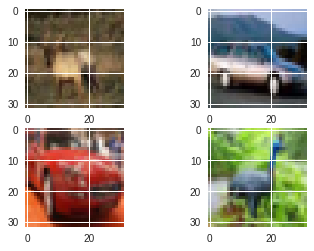

In [14]:
plt.figure(0)
plt.subplot(2, 2, 1)
plt.imshow(x1_train[0])

plt.subplot(2, 2, 2)
plt.imshow(x1_train[1])

plt.subplot(2, 2, 3)
plt.imshow(x1_train[2])

plt.subplot(2, 2, 4)
plt.imshow(x1_train[3])


plt.show()